## Experiments

Sequence Parameter set 'newSequence' initialized with 500 timepoint definitions
Dictionary Parameter set 'TenPctDict' initialized with 74 entries
Simulating 10 batch(s) of 7 dictionary entries
Starting Batch: 0
0
7
Starting Batch: 1
7
14
Starting Batch: 2
14
21
Starting Batch: 3
21
28
Starting Batch: 4
28
35
Starting Batch: 5
35
42
Starting Batch: 6
42
49
Starting Batch: 7
49
56
Starting Batch: 8
56
63
Starting Batch: 9
63
74


IndexError: index 150 is out of bounds for axis 1 with size 74

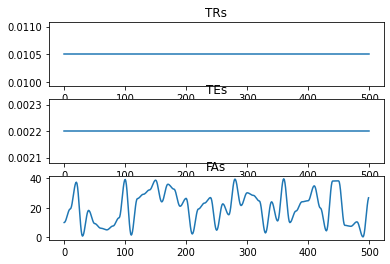

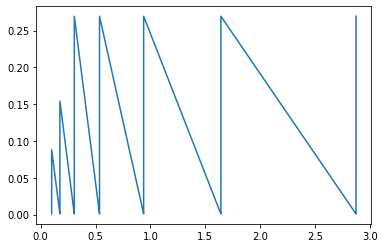

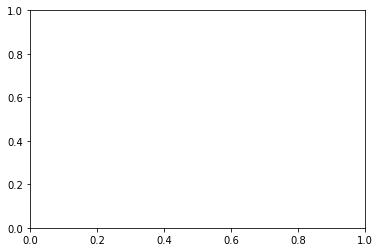

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)
from mrftools import SequenceParameters, DictionaryParameters, Simulation, SequenceType, Perlin
import numpy as np

# Create a sequence definition programmatically
TR = 0.0105; TE = 0.0022; FA_Range = [0,40]; FA_First = 10; numTimepoints = 500; wavelength = 10; seed = 1234
newSequence = SequenceParameters("newSequence",SequenceType.FISP)
newSequence.Initialize(TRs=np.ones(numTimepoints)*TR, TEs=np.ones(numTimepoints)*TE, FAs=Perlin.Generate(numTimepoints, min=FA_Range[0], max=FA_Range[1], firstValue=FA_First, wavelength=wavelength, seed=seed))
newSequence.Plot()
plt.figure()

# Create a T1/T2/B1 dictionary with variable 10% step size
TenPctDict = DictionaryParameters.GenerateFixedPercent("TenPctDict", percentStepSize=5, includeB1=False)
TenPctDict.Plot()
plt.figure()

# Perform a simulation with 1 beat, 500 timepoints, and 5 averaged spins
largescaleSimulation = Simulation(newSequence, TenPctDict, phaseRange=(-2*np.pi, 2*np.pi), numSpins=128)
results = largescaleSimulation.Execute(numBatches=10)
largescaleSimulation.Plot(dictionaryEntryNumbers=[150,275,3500,1500,7000])